## 🔬📊 Data Analysis on Extracted Scientific Information related to ZnO and IGZO ALD Processes

**Overview**
1. [Fetch and load the extracted JSON data](#fetch-load-data)

### ⬇️ Fetch and Load Data <a id='fetch-load-data'></a>

In [1]:
# Append the parent directory to sys.path
import sys
sys.path.append("..")

In [2]:
# Import packages
import os
from scikg_extract.utils.file_utils import read_json_file

In [3]:
def load_json_data_records(data_path: str, llm_model: str) -> dict[str, list[dict]]:
    """
    Load JSON data records from the specified directory filtered by LLM model.
    Args:
        data_path (str): Path to the directory containing JSON files.
        llm_model (str): The LLM model to filter the files.
    Returns:
        dict[str, list[dict]]: A dictionary with keys as 'category_filename_no_ext' and values as JSON data.
    """

    # Initialize a dictionary to hold JSON data records
    json_data_records: dict[str, list[dict]] = {}

    # Iterate through files in the data directory
    for root, _, files in os.walk(data_path):

        # Skip if no files found
        if not files: continue

        # Extract category and LLM model from the path
        category, llm = root.split(os.sep)[-2:]

        # Filter by LLM model
        if llm != llm_model: continue

        for file in files:

            # Process only JSON files
            if not file.endswith(".json"): continue

            # Read JSON file
            file_path = os.path.join(root, file)
            data = read_json_file(file_path)

            # Format key as category_filename_no_ext
            filename_no_ext = os.path.splitext(file)[0]
            key = f"{category}_{filename_no_ext}"

            # Handle duplicate keys by appending a suffix
            if key in json_data_records:
                total_similar = sum(1 for k in json_data_records if k.startswith(f"{key}"))
                key = f"{key}_{total_similar + 1}"
                print(f"Warning: Duplicate key found. Renaming to {key}")
            
            # Store data in the dictionary
            json_data_records[key] = data

    # Return the dictionary of JSON data records
    return json_data_records

In [84]:
# Paths to extracted data
zno_data_path = "../results/extracted-data/ALD/version3/ZnO-IGZO-papers/experimental-usecase/ZnO"
igzo_data_path = "../results/extracted-data/ALD/version3/ZnO-IGZO-papers/experimental-usecase/IGZO/AtomicLimits Database"

# Specify the LLM model used for extraction
llm_model = "qwen3-30b-a3b-instruct-2507"

In [85]:
# Load ZnO extracted data records
zno_json_data_records = load_json_data_records(zno_data_path, llm_model)
print(f"Total ZnO JSON records loaded: {len(zno_json_data_records)}")

# Load IGZO extracted data records
igzo_json_data_records = load_json_data_records(igzo_data_path, llm_model)
print(f"Total IGZO JSON records loaded: {len(igzo_json_data_records)}")

Total ZnO JSON records loaded: 162
Total IGZO JSON records loaded: 14


In [86]:
# Load the PubChem Synonym to CID mapping dictionary
synonym_to_cid_path = "../data/resources/PubChem-Synonym-CID.json"
synonym_to_cid_dict = read_json_file(synonym_to_cid_path)

# Lambda function to find synonym by CID
find_synonym = lambda cid: next((syn for syn, mapped_cid in synonym_to_cid_dict.items() if cid in mapped_cid.split(", ")), None)

### 📊 Data Analysis

#### Unique Precursors Used For ZnO and IGZO ALD Processes (Version 1)

In [87]:
from scikg_extract.utils.dict_utils import extract_properties_values
from scikg_extract.utils.clustering_utils import cluster_similar_values_dbscan

# Embedding model for clustering
embedding_model = "all-MiniLM-L6-v2"

# Precursor property path
precursor_property_path = "reactantSelection.precursor[*].precursor.value"

# Extract precursor unique values for ZnO
precursor_unique_values_zno = extract_properties_values(zno_json_data_records, precursor_property_path)

# Extract precursor unique values for IGZO
precursor_unique_values_igzo = extract_properties_values(igzo_json_data_records, precursor_property_path)

# Combine unique precursor values for both ZnO and IGZO
combined_precursor_values = list(set(precursor_unique_values_zno + precursor_unique_values_igzo))

# Cluster precursor values using DBSCAN
clustered_precursors = cluster_similar_values_dbscan(combined_precursor_values, embedding_model, min_samples=1)

#### Unique Co-Reactants Used For ZnO and IGZO ALD Processes (Version 1)

In [88]:
# Co-reactant property path
co_reactant_property_path = "reactantSelection.coReactant[*].coReactant.value"

# Extract co-reactant unique values for ZnO
co_reactant_unique_values_zno = extract_properties_values(zno_json_data_records, co_reactant_property_path)

# Extract co-reactant unique values for IGZO
co_reactant_unique_values_igzo = extract_properties_values(igzo_json_data_records, co_reactant_property_path)

# Combine unique co-reactant values for both ZnO and IGZO
combined_co_reactant_values = list(set(co_reactant_unique_values_zno + co_reactant_unique_values_igzo))

# Cluster co-reactant values using DBSCAN
clustered_co_reactants = cluster_similar_values_dbscan(combined_co_reactant_values, embedding_model, min_samples=1)

#### Unique Carrier and Purge Gases Used For ZnO and IGZO ALD Processes (Version 1)

In [89]:
# Carrier and purge gas property path
carrier_gas_property_path = "reactantSelection.carrierGas.value"
purge_gas_property_path = "reactantSelection.purgingGas.value"

# Extract carrier gas unique values for ZnO
carrier_gas_unique_values_zno = extract_properties_values(zno_json_data_records, carrier_gas_property_path)

# Extract purge gas unique values for ZnO
purge_gas_unique_values_zno = extract_properties_values(zno_json_data_records, purge_gas_property_path)

# Extract carrier gas unique values for IGZO
carrier_gas_unique_values_igzo = extract_properties_values(igzo_json_data_records, carrier_gas_property_path)

# Extract purge gas unique values for IGZO
purge_gas_unique_values_igzo = extract_properties_values(igzo_json_data_records, purge_gas_property_path)

# Combine unique carrier and purge gas values for both ZnO and IGZO
combined_gas_values = list(set(carrier_gas_unique_values_zno + purge_gas_unique_values_zno + carrier_gas_unique_values_igzo + purge_gas_unique_values_igzo))

# Remove empty strings if present
combined_gas_values = [value for value in combined_gas_values if value.strip()]

# Cluster carrier and purge gas values using DBSCAN
clustered_gases = cluster_similar_values_dbscan(combined_gas_values, embedding_model, min_samples=1)

#### 🧪 ZnO and IGZO ALD Processes

In [90]:
from scikg_extract.utils.dict_utils import get_value_by_path
def extract_unique_values_with_counts(json_data_records: dict[str, list[dict]], property: str) -> dict[str, int]:
    """
    Extract unique values and their counts for a specified property from JSON data records.
    Args:
        json_data_records (dict[str, list[dict]]): Dictionary of JSON data records.
        property (str): The property to extract unique values for.
    Returns:
        dict[str, int]: A dictionary with unique values as keys and their counts as values.
    """
    # Initialize a dictionary to hold unique values and their counts
    unique_values: dict[str, int] = {}

    # Iterate through JSON data records and extract unique values
    for record in json_data_records.values():

        # Inialize a set to hold unique values for the current record
        unique_values_record = set()
        
        # Iterate through each process in the record
        for entry in record["processes"]:
            
            # Extract the property value
            values = get_value_by_path(entry, property)

            # Skip if property not present or empty
            if not values: continue

            # Update the dictionary with counts
            for value, _ in values:
                unique_values_record.add(value)
        
        # Update counts for unique values found in the current record
        for value in unique_values_record:
            if not value in unique_values:
                unique_values[value] = 0
            unique_values[value] += 1
    
    # Sort the unique values dictionary by counts in descending order
    unique_values = dict(sorted(unique_values.items(), key=lambda item: item[1], reverse=True))

    # Return the set of unique values
    return unique_values

#### Different ALD Methods Used for ZnO and IGZO Deposition

In [91]:
ald_methods_zno = extract_unique_values_with_counts(zno_json_data_records, "aldSystem.aldMethod[*].method")
ald_methods_igzo = extract_unique_values_with_counts(igzo_json_data_records, "aldSystem.aldMethod[*].method")

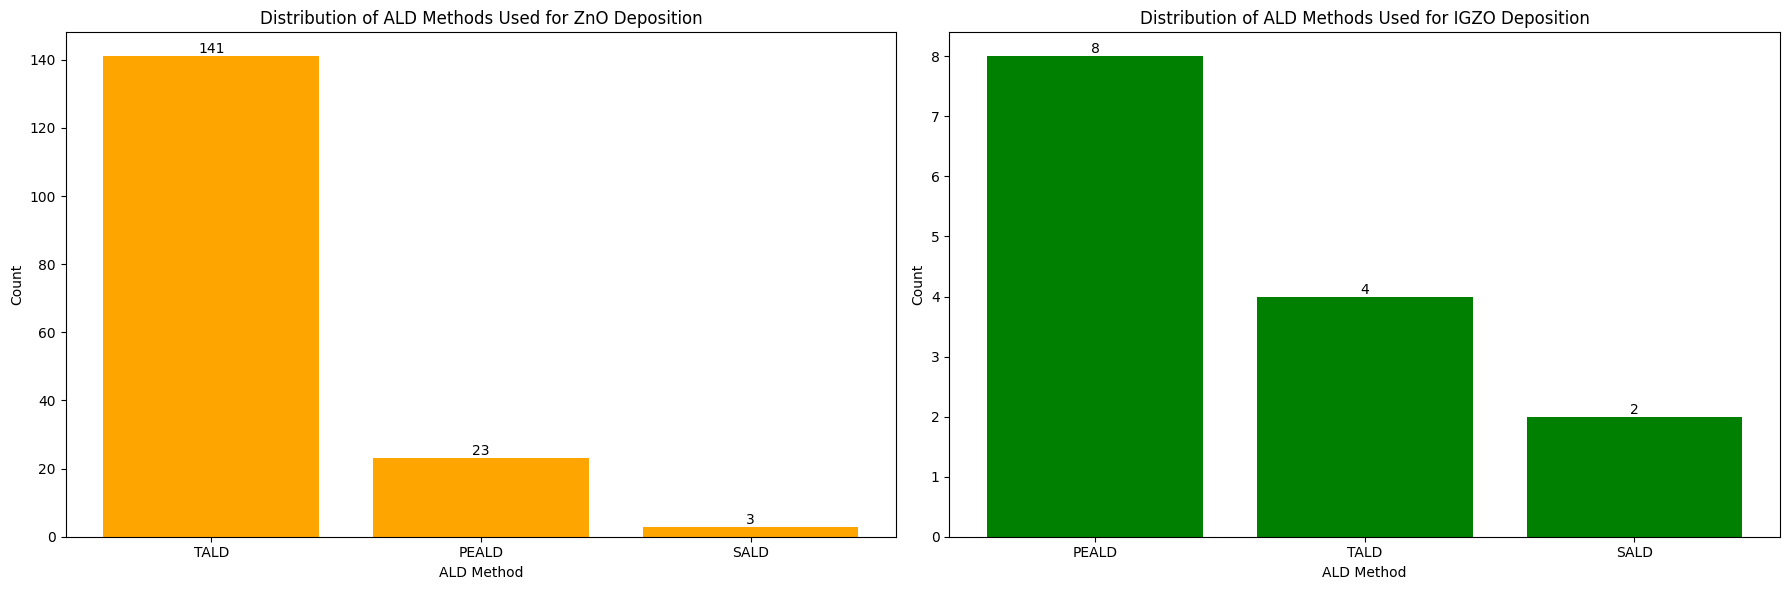

In [92]:
# Plotting ZnO and IGZO ALD Methods Distribution
import matplotlib.pyplot as plt

# Creating two subplots for ZnO and IGZO
plt.figure(figsize=(18, 6))

# ZnO ALD Methods Distribution
plt.subplot(1, 2, 1)
plt.bar(ald_methods_zno.keys(), ald_methods_zno.values(), color='orange')
for i in range(len(ald_methods_zno)): plt.text(i, list(ald_methods_zno.values())[i], str(list(ald_methods_zno.values())[i]), ha='center', va='bottom')
plt.xlabel("ALD Method")
plt.ylabel("Count")
plt.title("Distribution of ALD Methods Used for ZnO Deposition")

# IGZO ALD Methods Distribution
plt.subplot(1, 2, 2)
plt.bar(ald_methods_igzo.keys(), ald_methods_igzo.values(), color='green')
for i in range(len(ald_methods_igzo)): plt.text(i, list(ald_methods_igzo.values())[i], str(list(ald_methods_igzo.values())[i]), ha='center', va='bottom')
plt.xlabel("ALD Method")
plt.ylabel("Count")
plt.title("Distribution of ALD Methods Used for IGZO Deposition")
plt.tight_layout()
plt.show()

#### Unique Precursors Used for ZnO and IGZO ALD

In [93]:
# Unique Precursors Used for ZnO ALD
precursors_zno = extract_unique_values_with_counts(zno_json_data_records, "reactantSelection.precursor[*].precursor.sameAs[*]")

# Map Precursor CIDs to Synonyms
mapped_precursors_zno = {find_synonym(key.split("/")[-1]): value for key, value in precursors_zno.items()}

# Unique Precursors Used for IGZO ALD
precursors_igzo = extract_unique_values_with_counts(igzo_json_data_records, "reactantSelection.precursor[*].precursor.sameAs[*]")

# Map Precursor CIDs to Synonyms
mapped_precursors_igzo = {find_synonym(key.split("/")[-1]): value for key, value in precursors_igzo.items()}

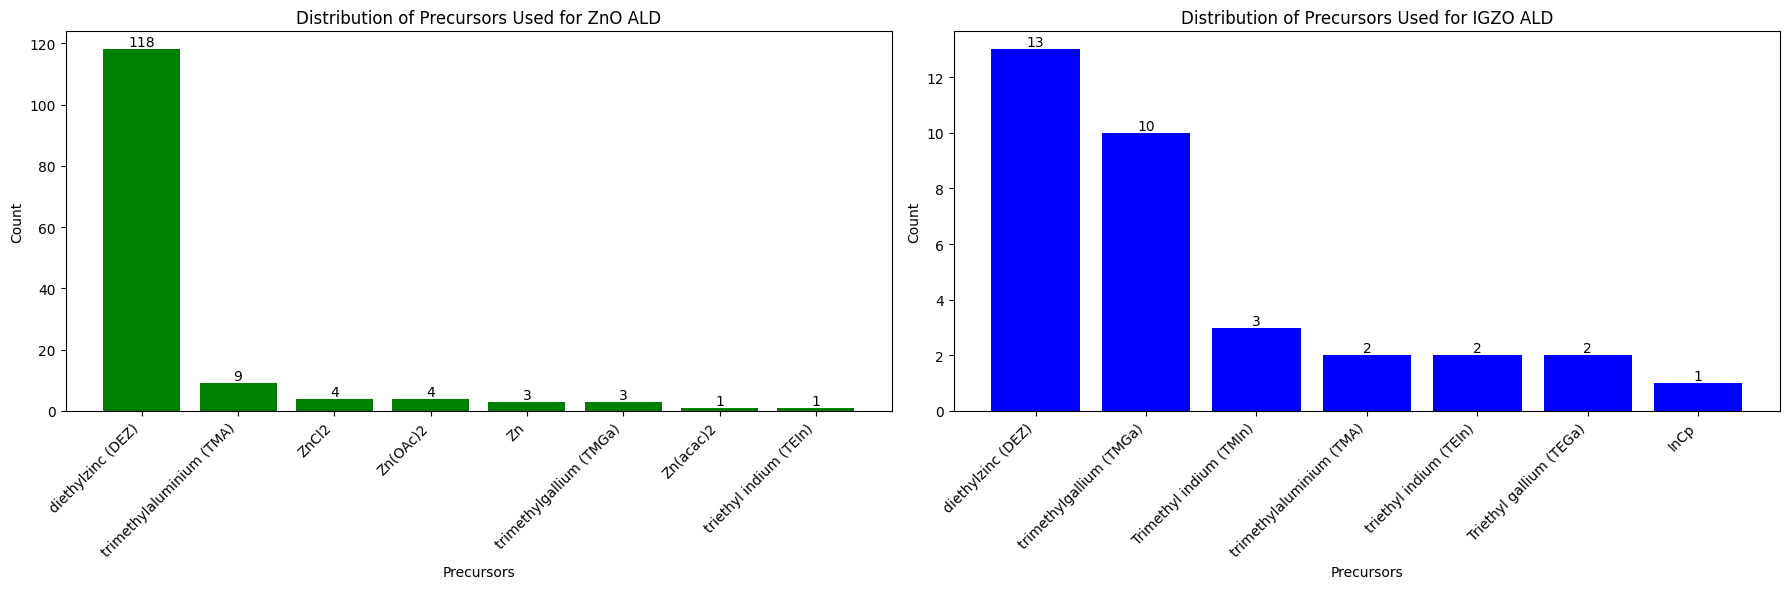

In [94]:
# Plotting two subplots for ZnO and IGZO Precursors Distribution

plt.figure(figsize=(18, 6))

# ZnO Precursors Distribution
plt.subplot(1, 2, 1)
plt.bar(mapped_precursors_zno.keys(), mapped_precursors_zno.values(), color='green')
for i in range(len(mapped_precursors_zno)): plt.text(i, list(mapped_precursors_zno.values())[i], str(list(mapped_precursors_zno.values())[i]), ha='center', va='bottom')
plt.xlabel("Precursors")
plt.ylabel("Count")
plt.title("Distribution of Precursors Used for ZnO ALD")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# IGZO Precursors Distribution
plt.subplot(1, 2, 2)
plt.bar(mapped_precursors_igzo.keys(), mapped_precursors_igzo.values(), color='blue')
for i in range(len(mapped_precursors_igzo)): plt.text(i, list(mapped_precursors_igzo.values())[i], str(list(mapped_precursors_igzo.values())[i]), ha='center', va='bottom')
plt.xlabel("Precursors")
plt.ylabel("Count")
plt.title("Distribution of Precursors Used for IGZO ALD")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Unique Co-reactants Used for ZnO ALD

In [95]:
# Unique Co-reactants Used for ZnO ALD
coreactants_zno = extract_unique_values_with_counts(zno_json_data_records, "reactantSelection.coReactant[*].coReactant.sameAs[*]")

# Map Co-reactant CIDs to Synonyms
mapped_coreactants_zno = {find_synonym(key.split("/")[-1]): value for key, value in coreactants_zno.items()}

# Unique Co-reactants Used for IGZO ALD
coreactants_igzo = extract_unique_values_with_counts(igzo_json_data_records, "reactantSelection.coReactant[*].coReactant.sameAs[*]")

# Map Co-reactant CIDs to Synonyms
mapped_coreactants_igzo = {find_synonym(key.split("/")[-1]): value for key, value in coreactants_igzo.items()}

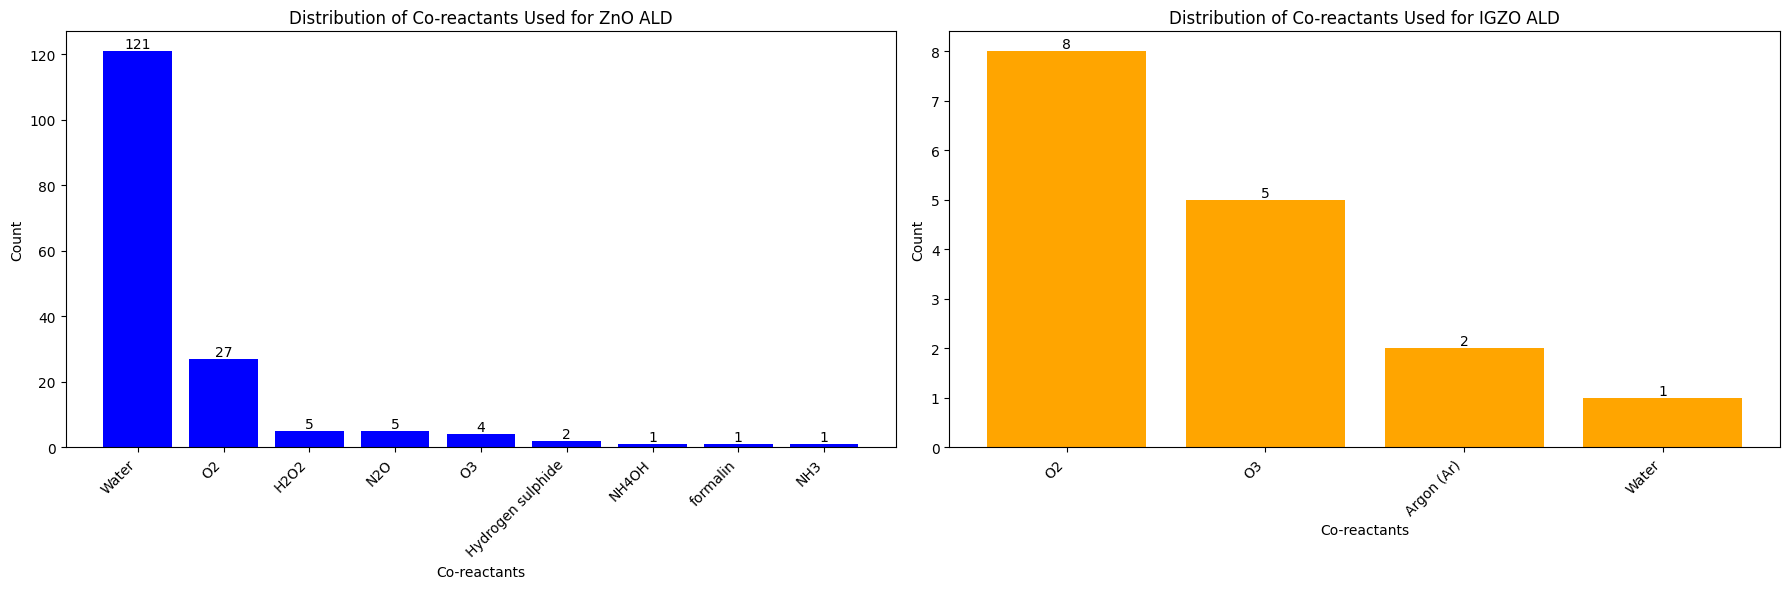

In [96]:
# Plotting two subplot for ZnO and IGZO Co-reactants Distribution

plt.figure(figsize=(18, 6))

# ZnO Co-reactants Distribution
plt.subplot(1, 2, 1)
plt.bar(mapped_coreactants_zno.keys(), mapped_coreactants_zno.values(), color='blue')
for i in range(len(mapped_coreactants_zno)): plt.text(i, list(mapped_coreactants_zno.values())[i], str(list(mapped_coreactants_zno.values())[i]), ha='center', va='bottom')
plt.xlabel("Co-reactants")
plt.ylabel("Count")
plt.title("Distribution of Co-reactants Used for ZnO ALD")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# IGZO Co-reactants Distribution
plt.subplot(1, 2, 2)
plt.bar(mapped_coreactants_igzo.keys(), mapped_coreactants_igzo.values(), color='orange')
for i in range(len(mapped_coreactants_igzo)): plt.text(i, list(mapped_coreactants_igzo.values())[i], str(list(mapped_coreactants_igzo.values())[i]), ha='center', va='bottom')
plt.xlabel("Co-reactants")
plt.ylabel("Count")
plt.title("Distribution of Co-reactants Used for IGZO ALD")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Plotting Deposition Temperature against Growth per Cycle for ZnO ALD

In [97]:
def zip_multiple_property_values(json_data_records: dict[str, list[dict]], property_list: list[str]) -> list[tuple]:
    """
    Zip multiple property values from JSON data records.
    Args:
        json_data_records (dict[str, list[dict]]): Dictionary of JSON data records.
        property_list (list[str]): List of properties to extract and zip.
    Returns:
        list[tuple]: A list of tuples containing zipped property values.
    """
    # Initialize a list to hold zipped property values
    zipped_values = []

    # Iterate through JSON data records
    for record in json_data_records.values():

        # Iterate through each process in the record
        for entry in record["processes"]:
            
            # Initialize a list to hold extracted values for the current entry
            extracted_values = []

            # Extract values for each property in the property list
            for prop in property_list:
                values = get_value_by_path(entry, prop)
                if not values: continue
                extracted_values.extend([value for value, _ in values])  

            # Append the tuple of extracted values to the zipped values list
            zipped_values.append(tuple(extracted_values))
    
    # Remove tuples with missing values
    zipped_values = [tup for tup in zipped_values if len(tup) == len(property_list)]

    # Return the list of zipped property values
    return zipped_values

In [98]:
list_of_properties = [
    "aldSystem.aldMethod[0].method",
    "processParameters.temperature.quantityValue.numericValue", 
    "processParameters.thicknessControl.growthPerCycle.values[*].value.quantityValue.numericValue"
]
ald_method_temperature_and_gpc = zip_multiple_property_values(zno_json_data_records, list_of_properties)

# Sort the values by ald method
ald_method_temperature_and_gpc.sort(key=lambda x: x[0])

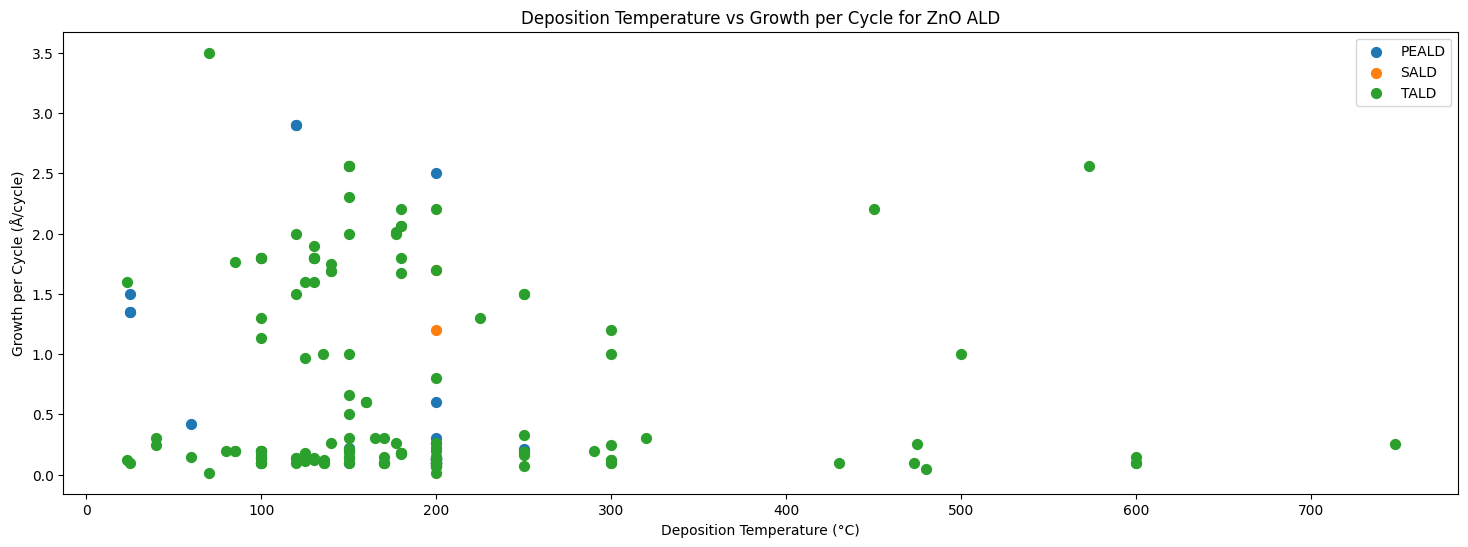

In [99]:
# Assign numerical categories to ALD methods for coloring
ald_methods = []
ald_method_to_category = {method: idx for idx, method in enumerate(set([item[0] for item in ald_method_temperature_and_gpc]))}
for item in ald_method_temperature_and_gpc:
    ald_methods.append(ald_method_to_category[item[0]])

# Extract individual lists from the zipped tuples
temperatures = [item[1] for item in ald_method_temperature_and_gpc]
gpcs = [item[2] for item in ald_method_temperature_and_gpc]

# Clustering Deposition Temperature vs Growth per Cycle for ZnO ALD based on ALD Method
plt.figure(figsize=(18, 6))
for method, category in ald_method_to_category.items():
    method_temperatures = [temperatures[i] for i in range(len(ald_methods)) if ald_methods[i] == category]
    method_gpcs = [gpcs[i] for i in range(len(ald_methods)) if ald_methods[i] == category]
    plt.scatter(method_temperatures, method_gpcs, label=method, s=50)
plt.xlabel("Deposition Temperature (°C)")
plt.ylabel("Growth per Cycle (Å/cycle)")
plt.title("Deposition Temperature vs Growth per Cycle for ZnO ALD")
plt.legend()
plt.show()

In [ ]:
for method, category in ald_method_to_category.items():
    method_temperatures = [temperatures[i] for i in range(len(ald_methods)) if ald_methods[i] == category]
    method_gpcs = [gpcs[i] for i in range(len(ald_methods)) if ald_methods[i] == category]
    print(f"Category: {method}")
    print(f"Temperature: {method_temperatures}")
    print(f"GPC: {method_gpcs}")

In [101]:
zno_json_data_records_filtered = {}
for key, value in zno_json_data_records.items():
    for entry in value["processes"]:
        precursor = get_value_by_path(entry, "reactantSelection.precursor[*].precursor.sameAs[*]")
        coreactant = get_value_by_path(entry, "reactantSelection.coReactant[*].coReactant.sameAs[*]")
        if precursor and any("101667988" in p for p, _ in precursor):
            if coreactant and any("962" in c for c, _ in coreactant):
                zno_json_data_records_filtered[key] = value

In [102]:
list_of_properties = [
    "aldSystem.aldMethod[0].method",
    "processParameters.temperature.quantityValue.numericValue", 
    "processParameters.thicknessControl.growthPerCycle.values[*].value.quantityValue.numericValue"
]
ald_method_temperature_and_gpc = zip_multiple_property_values(zno_json_data_records_filtered, list_of_properties)

# Sort the values by ald method
ald_method_temperature_and_gpc.sort(key=lambda x: x[0])

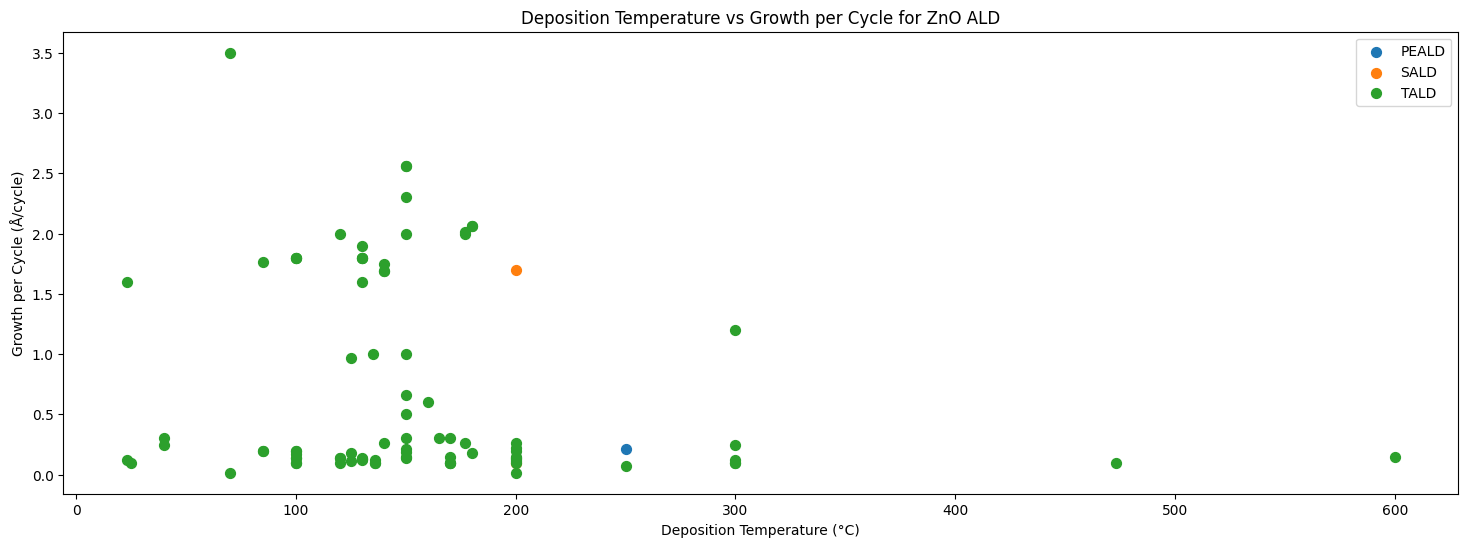

In [103]:
# Assign numerical categories to ALD methods for coloring
ald_methods = []
ald_method_to_category = {method: idx for idx, method in enumerate(set([item[0] for item in ald_method_temperature_and_gpc]))}
for item in ald_method_temperature_and_gpc:
    ald_methods.append(ald_method_to_category[item[0]])

# Extract individual lists from the zipped tuples
temperatures = [item[1] for item in ald_method_temperature_and_gpc]
gpcs = [item[2] for item in ald_method_temperature_and_gpc]

# Clustering Deposition Temperature vs Growth per Cycle for ZnO ALD based on ALD Method
plt.figure(figsize=(18, 6))
for method, category in ald_method_to_category.items():
    method_temperatures = [temperatures[i] for i in range(len(ald_methods)) if ald_methods[i] == category]
    method_gpcs = [gpcs[i] for i in range(len(ald_methods)) if ald_methods[i] == category]
    plt.scatter(method_temperatures, method_gpcs, label=method, s=50)
plt.xlabel("Deposition Temperature (°C)")
plt.ylabel("Growth per Cycle (Å/cycle)")
plt.title("Deposition Temperature vs Growth per Cycle for ZnO ALD")
plt.legend()
plt.show()